Introduction

Scenario 
A app development company is looking to create the next big Google application. The task is to analyze the application data from google play store and figure out what kind of applciation they would like to build. 

In [34]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt


In [2]:
# Loading the original datafile for google play
orginal_play = pd.read_csv('play_clean.csv')

# Making a copy of the file
play = orginal_play.copy()

In [3]:
#Checking data
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Month,Year
0,Photo Editor & Candy Camera & Grid & Scrapbook,Art and Design,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,01/18,1,18
1,Coloring Book Moana,Art and Design,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,01/18,1,18
2,"U Launcher Lite – Free Live Cool Themes, Hide ...",Art and Design,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,08/18,8,18
3,Sketch - Draw & Paint,Art and Design,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,06/18,6,18
4,Pixel Draw - Number Art Coloring Book,Art and Design,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,06/18,6,18


## Univariable Analysis

## Category

The first variable we're going to take explore is category. 

In [4]:
play.Category.describe()

count      10841
unique        33
top       Family
freq        1972
Name: Category, dtype: object

In [5]:
play.groupby('Category')['App'].count().sort_values(ascending = False)

Category
Family                 1972
Game                   1144
Tools                   843
Medical                 463
Business                460
Productivity            424
Personalization         392
Communication           387
Sports                  384
Lifestyle               383
Finance                 366
Health and Fitness      341
Photography             335
Social                  295
News and Magazines      283
Shopping                260
Travel and Local        258
Dating                  234
Books and Reference     231
Video Players           175
Education               156
Entertainment           149
Maps and Navigation     137
Food and Drink          127
House and Home           88
Libraries and Demo       85
Auto and Vehicles        85
Weather                  82
Art and Design           65
Events                   64
Comics                   60
Parenting                60
Beauty                   53
Name: App, dtype: int64

We can see that there area  total of 33 unique categories, with Family and Game taking the top two spots followed closely by Tools, Medical, and Business. In the bottom spots, ther'es Beauty, Parenting, Comics, Events, and Art and Design. 

## Rating

In [6]:
play.groupby('Rating')['App'].count().sort_values(ascending = False)

Rating
4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      14
2.0      12
1.8       8
1.7       8
2.1       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: App, dtype: int64

In [7]:
play.Rating.isnull().value_counts()

False    9367
True     1474
Name: Rating, dtype: int64

In [8]:
play.Rating.describe()

count    9367.000000
mean        4.191513
std         0.515735
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [9]:
#Creating bins for ratings
bins = [1, 2.5, 4, 4.9, 5]
group_names = ['Low Rating', 'Mid-Range Rating', 'High Rating', 'Perfect Score']
play['Rating_Groups'] = pd.cut(play['Rating'], bins, labels = group_names)
rating= play
rating = rating.dropna()

#### Quick Analysis
The data shows that the majority of the ratings fall between 4-5 stars with 4.3-4.5 having the most amount of ratings

## Reviews

In [10]:
play.Reviews.describe()

count    1.084100e+04
mean     4.441119e+05
std      2.927629e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.476800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

## Installs

In [11]:
play.Installs.describe()

count    1.084100e+04
mean     1.546291e+07
std      8.502557e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [12]:
play.sort_values(by='Installs', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Month,Year,Rating_Groups
3896,Subway Surfers,Game,4.5,27711703,76,1000000000,Free,0.00,Everyone 10+,Arcade,07/18,7,18,High Rating
3943,Facebook,Social,4.1,78128208,Varies with device,1000000000,Free,0.00,Teen,Social,08/18,8,18,High Rating
335,Messenger – Text And Video Chat For Free,Communication,4.0,56642847,Varies with device,1000000000,Free,0.00,Everyone,Communication,08/18,8,18,Mid-Range Rating
3523,Google Drive,Productivity,4.4,2731211,Varies with device,1000000000,Free,0.00,Everyone,Productivity,08/18,8,18,High Rating
3565,Google Drive,Productivity,4.4,2731211,Varies with device,1000000000,Free,0.00,Everyone,Productivity,08/18,8,18,High Rating
2884,Google Photos,Photography,4.5,10859051,Varies with device,1000000000,Free,0.00,Everyone,Photography,08/18,8,18,High Rating
3665,Youtube,Video Players,4.3,25655305,Varies with device,1000000000,Free,0.00,Teen,Video Players & Editors,08/18,8,18,High Rating
2853,Google Photos,Photography,4.5,10858538,Varies with device,1000000000,Free,0.00,Everyone,Photography,08/18,8,18,High Rating
4234,Skype - Free Im & Video Calls,Communication,4.1,10484169,Varies with device,1000000000,Free,0.00,Everyone,Communication,08/18,8,18,High Rating
3687,Google Play Movies & Tv,Video Players,3.7,906384,Varies with device,1000000000,Free,0.00,Teen,Video Players & Editors,08/18,8,18,Mid-Range Rating


## Type

In [13]:
play.groupby(['Type']).size().rename('count').reset_index()

,Type,count
0,Free,10040
1,Paid,800


In [14]:
play.Type.describe()

count     10840
unique        2
top        Free
freq      10040
Name: Type, dtype: object

## Price

In [15]:
play.groupby('Price')['App'].count().sort_values(ascending = False)

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
24.99         7
3.49          7
7.99          7
29.99         7
5.49          6
19.99         6
11.99         5
12.99         5
8.99          5
6.49          5
10.00         3
2.00          3
16.99         3
1.00          3
10.99         2
8.49          2
          ...  
25.99         1
394.99        1
389.99        1
379.99        1
299.99        1
200.00        1
154.99        1
109.99        1
89.99         1
74.99         1
46.99         1
37.99         1
30.99         1
28.99         1
19.90         1
3.88          1
19.40         1
18.99         1
15.99         1
15.46         1
14.00         1
4.85          1
4.84          1
4.80          1
4.77          1
4.60          1
4.59          1
4.29          1
3.90          1
5.00          1
Name: App, Length:

In [16]:
play.Price.describe()

count    10841.000000
mean         1.027273
std         15.948971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

## Content Rating

In [17]:
play.groupby('Content_Rating')['App'].count().sort_values(ascending = False)

Content_Rating
Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: App, dtype: int64

In [18]:
play.Content_Rating.describe()

count        10841
unique           6
top       Everyone
freq          8715
Name: Content_Rating, dtype: object

## Genres

In [19]:
play.groupby('Genres')['App'].count().sort_values(ascending = False).head()

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: App, dtype: int64

In [20]:
play.Genres.describe()

count     10841
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [21]:
play.groupby('Month')['App'].count().sort_values(ascending = False)

Month
7     3163
8     1594
6     1273
5      978
3      667
4      616
2      534
1      491
12     426
10     398
11     387
9      314
Name: App, dtype: int64

In [22]:
play.Month.describe()

count    10841.000000
mean         6.421917
std          2.578619
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: Month, dtype: float64

In [23]:
play.Last_Updated.describe()

count     10841
unique       88
top       07/18
freq       2864
Name: Last_Updated, dtype: object

## Bi-Variative Analysis

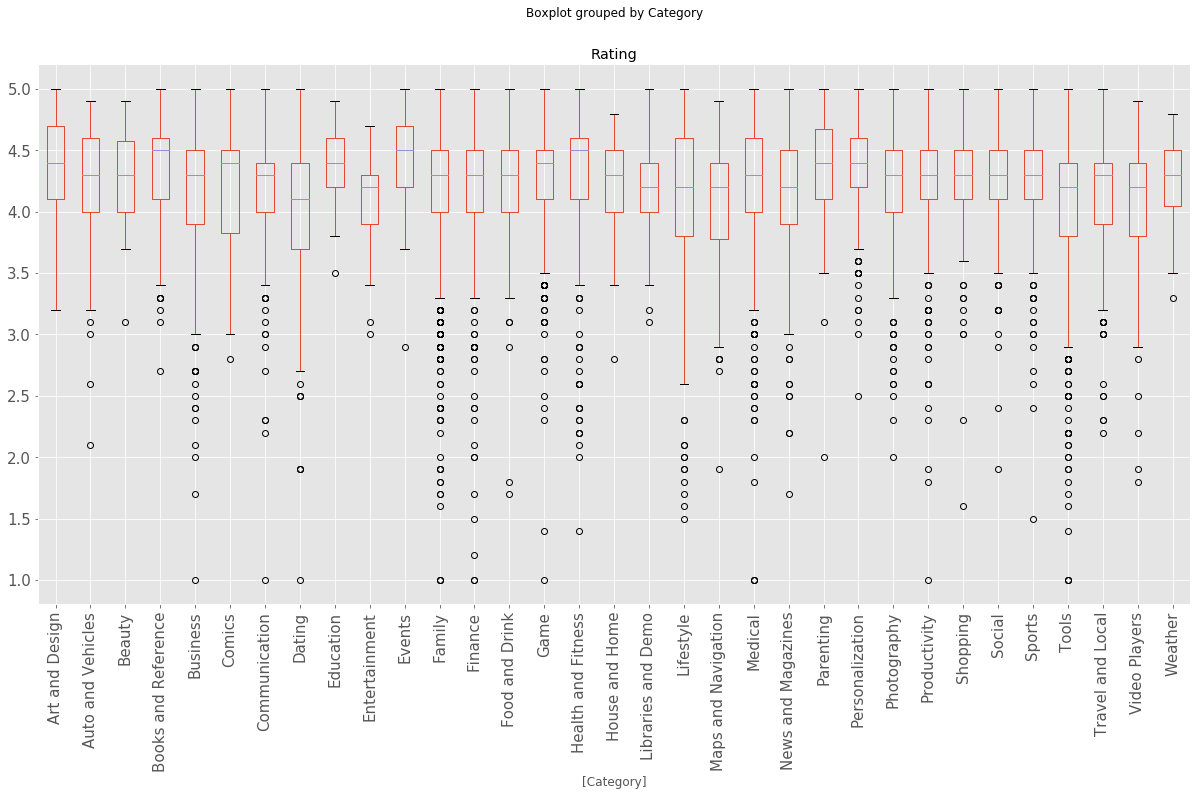

In [43]:
play.boxplot(column=['Rating'], by =['Category'], rot=90, figsize = (20,10), fontsize = 15);

In [45]:
play[play['Category']=='Entertainment']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Month,Year,Rating_Groups
855,Netflix,Entertainment,4.4,5456208,Varies with device,100000000,Free,0.00,Teen,Entertainment,07/18,7,18,High Rating
856,Complete Spanish Movies,Entertainment,4.0,11656,4.5,1000000,Free,0.00,Everyone,Entertainment,01/18,1,18,Mid-Range Rating
857,Pluto Tv - It’S Free Tv,Entertainment,4.2,28948,Varies with device,1000000,Free,0.00,Teen,Entertainment,08/18,8,18,High Rating
858,Tubi Tv - Free Movies & Tv,Entertainment,4.3,296771,11,10000000,Free,0.00,Teen,Entertainment,07/18,7,18,High Rating
859,Youtube Kids,Entertainment,4.5,470089,Varies with device,50000000,Free,0.00,Everyone,Entertainment;Music & Video,08/18,8,18,High Rating
860,Mobile Tv,Entertainment,3.5,10939,4.6,10000000,Free,0.00,Everyone,Entertainment,04/16,4,16,Mid-Range Rating
861,Tv+,Entertainment,4.2,98509,Varies with device,5000000,Free,0.00,Everyone,Entertainment,06/18,6,18,High Rating
862,Digital Tv,Entertainment,3.1,5241,Varies with device,5000000,Free,0.00,Everyone,Entertainment,06/18,6,18,Mid-Range Rating
863,Motorola Spotlight Player™,Entertainment,4.6,22508,3.3,10000000,Free,0.00,Everyone,Entertainment,07/15,7,15,High Rating
864,Vigo Lite,Entertainment,4.2,10291,6.5,5000000,Free,0.00,Teen,Entertainment,08/18,8,18,High Rating
